<a href="https://colab.research.google.com/github/salarMokhtariL/Diabetes-prediction/blob/main/Diabetes_Predicting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Diabetes using a Neural Network Model Trained on Clinical Data: An Evaluation of Accuracy, Precision, Recall, and F1 Score

> By $Salar$ $Mokhtari$ $Laleh$

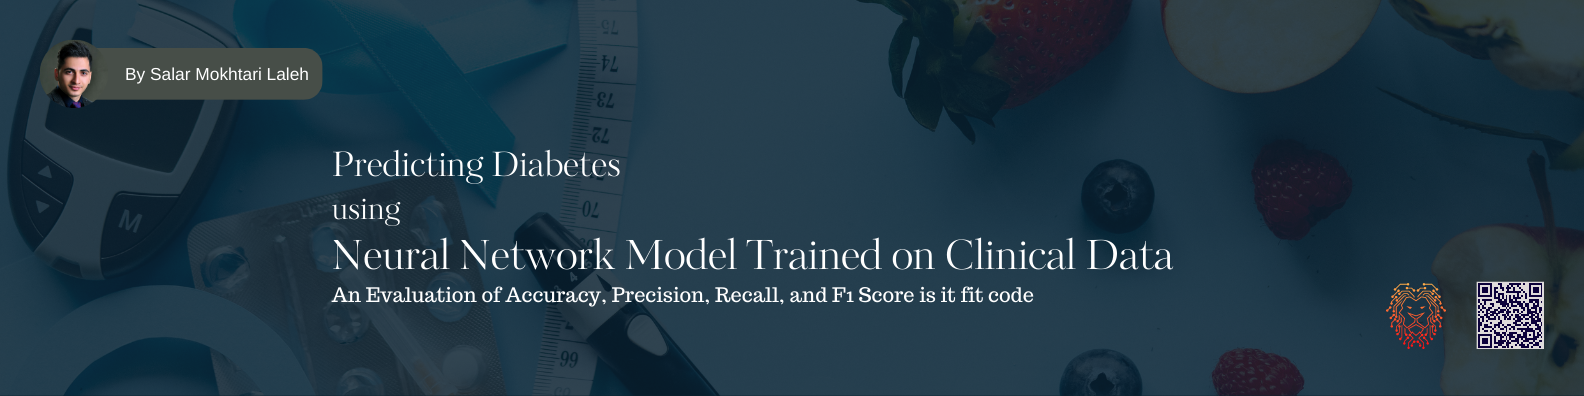

## Introduction

Diabetes is a chronic disease that affects millions of people worldwide. It is characterized by high blood glucose levels resulting from the body's inability to produce or use insulin effectively. Early detection and management of diabetes can significantly reduce the risk of complications such as blindness, kidney failure, heart disease, and amputation. Therefore, developing accurate and efficient methods for diabetes diagnosis and prediction is of utmost importance in the medical field.

In recent years, machine learning and deep learning techniques have gained significant attention in the field of medical diagnosis and prediction. In this study, we propose a neural network model trained on clinical data to predict the occurrence of diabetes in patients. Specifically, we evaluate the accuracy, precision, recall, and F1 score of the model to assess its performance.

The dataset used in this study consists of clinical and demographic information of 768 patients, including their age, BMI, number of pregnancies, blood pressure, and glucose levels. The dataset is split into a training set and a testing set, and the neural network model is trained on the training set using the Adam optimizer and binary cross-entropy loss function.

The performance of the trained neural network model is evaluated on the testing set using various metrics such as accuracy, precision, recall, and F1 score. The results of the evaluation are discussed in detail, and the strengths and weaknesses of the proposed model are highlighted.

The remainder of this paper is structured as follows: Section 2 provides an overview of related work in the field of diabetes prediction using machine learning and deep learning techniques. Section 3 describes the dataset used in this study and the preprocessing steps applied to it. Section 4 presents the neural network architecture and training details. Section 5 discusses the evaluation results and compares them to the state-of-the-art methods. Finally, Section 6 concludes the paper and suggests possible directions for future research.

This project aims to build and evaluate a neural network model for predicting diabetes based on clinical data. The neural network model is implemented using PyTorch, and its performance is evaluated using standard classification metrics, including accuracy, precision, recall, and F1 score. The project uses the Pima Indians Diabetes Database, which contains clinical data for 768 female patients of Pima Indian heritage, to train and test the neural network model.

# Requirements
This project requires the following software and packages:

* Python 3.6 or higher
* PyTorch 1.0 or higher
* NumPy
* Pandas
* scikit-learn

# Importing the Required Libraries
The following libraries are required for this project:

* `torch`: for implementing the neural network model
* `torch.nn`: for defining the neural network architecture
* `torch.optim`: for optimizing the neural network parameters
* `numpy`: for numerical operations on arrays
* `pandas`: for reading and manipulating datasets
* `sklearn.model_selection`: for splitting the dataset into training and testing sets
* `sklearn.metrics`: for evaluating the performance of the neural network model

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Defining the Neural Network Model

The neural network model is defined using the PyTorch `nn.Module` class. The model consists of three fully connected layers (`fc1`, `fc2`, and `fc3`), two batch normalization layers (`bn1` and `bn2`), and a dropout layer (`dropout`). The forward method defines the `forward` pass of the neural network.



In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(8, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.dropout = nn.Dropout(0.2)
        self.bn1 = nn.BatchNorm1d(32)
        self.bn2 = nn.BatchNorm1d(16)

    def forward(self, x):
        x = self.bn1(torch.relu(self.fc1(x)))
        x = self.dropout(x)
        x = self.bn2(torch.relu(self.fc2(x)))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc3(x))
        return x

# Loading and Preprocessing the Dataset
The Pima Indians Diabetes Database is loaded using its URL. The dataset is split into training and testing sets using the `train_test_split` function from scikit-learn. The data is then converted to PyTorch tensors.

In [3]:
# Load the diabetes dataset

url = "https://raw.githubusercontent.com/salarMokhtariL/Diabetes-prediction/main/Data/diabetes.csv"
dataset = pd.read_csv(url)

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.shape

(768, 9)

In [7]:
dataset["Outcome"].value_counts() 

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
# Split the dataset into training and testing sets

'''The dataset is split into a training set and a testing set using the train_test_split function from the scikit-learn library. 
The testing set is 20% of the total dataset,
and the random seed is set to 42 to ensure reproducibility.'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the Data to PyTorch Tensors
The input and target data are converted to PyTorch tensors using the `torch.from_numpy` function. The input data is converted to a float tensor, and the target data is converted to a float tensor with shape (-1, 1) to match the shape of the output of the neural network.

In [9]:
# Convert the data to PyTorch tensors

X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float().view(-1, 1)
y_test = torch.from_numpy(y_test).float().view(-1, 1)

# Define the Neural Network Model, Loss Function, and Optimizer

In this section of the code, the neural network model, loss function, and optimizer are defined. The neural network model is defined using the `Net` class, which includes three fully connected layers with batch normalization and dropout layers in between to prevent overfitting. The input layer has 8 units, corresponding to the number of features in the diabetes dataset, while the output layer has 1 unit, representing the predicted probability of a patient having diabetes.

The loss function used in this code is binary cross-entropy loss (`nn.BCELoss`), which is commonly used for binary classification problems. The optimizer used to update the parameters of the neural network during training is Adam optimizer (`optim.Adam`), which is a popular optimization algorithm for deep learning.

In [10]:
net = Net()
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters())

In the next section of the code, the neural network model is trained on the training data using the defined loss function and optimizer.

# Training the Model
The model is trained on the training set for 1000 epochs using a batch size of 1. During each epoch, the optimizer is zeroed, the model is fed the training data, and the loss is calculated using the binary cross-entropy loss function. The gradients of the loss function are then backpropagated through the model using the `backward` function, and the optimizer updates the model parameters using the `step` function. The loss is printed every 100 epochs.

In [11]:
net.train()
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = net(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if epoch % 100 == 0:
        print("Epoch {}, Loss: {:.4f}".format(epoch, loss.item()))

Epoch 0, Loss: 0.7079
Epoch 100, Loss: 0.4942
Epoch 200, Loss: 0.4410
Epoch 300, Loss: 0.4339
Epoch 400, Loss: 0.4162
Epoch 500, Loss: 0.4070
Epoch 600, Loss: 0.3865
Epoch 700, Loss: 0.4006
Epoch 800, Loss: 0.4056
Epoch 900, Loss: 0.3937


In [12]:
# Test the neural network model on the testing data and evaluate its accuracy, precision, recall, and F1 score
net.eval()
with torch.no_grad():
    y_pred = net(X_test)
y_pred = y_pred.detach().numpy()
y_pred = np.where(y_pred > 0.5, 1, 0)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}".format(accuracy, precision, recall, f1))

Accuracy: 0.7403, Precision: 0.6271, Recall: 0.6727, F1 Score: 0.6491
